<a href="https://colab.research.google.com/github/hyuntaedo/FastCampus_DataMining_Problem/blob/main/Chapter_02_%EC%9A%B0%EB%A6%AC_%EC%95%A0%EB%8A%94_%EB%A8%B8%EB%A6%AC%EB%8A%94_%EC%A2%8B%EC%9D%80%EB%8D%B0%2C_%EA%B3%B5%EB%B6%80%EB%A5%BC_%EC%95%88%ED%95%B4%EC%84%9C_%EA%B7%B8%EB%9E%98%EC%9A%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : <br>우리 애는 머리는 좋은데, 공부를 안해서 그래요 - 데이터로 살펴보는 우리 아이 학습 성공/실패 요소
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 xAPI-Edu-Data 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    xAPI-Edu-Data.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음)
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

## 최종 목표
    - 연구용 Tabular 데이터의 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Logistic Regression, XGBoost 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 연구용 데이터의 목적


### 연구용 데이터의 인용


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- 한글폰트


In [2]:
# !apt-get update -qq
# !apt-get install fonts-nanum* -qq

In [3]:
# # 폰트 설정하기 
# import matplotlib.font_manager as fm
# import matplotlib
# path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=path, size=10)
# plt.rc('font', family='NanumBarunGothic') 
# matplotlib.font_manager._rebuild()

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [4]:
import os

In [5]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] = 'kumahappy'
os.environ['KAGGLE_KEY'] = 'a6676c86b1e77caa856b2938ee49e939'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [6]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d aljarah/xAPI-Edu-Data

  0% 0.00/5.54k [00:00<?, ?B/s]
100% 5.54k/5.54k [00:00<00:00, 5.13MB/s]


In [7]:
!unzip -qq '/content/xAPI-Edu-Data.zip'

### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [35]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('/content/xAPI-Edu-Data.csv',encoding='utf-8')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 데이터프레임의 각 컬럼 분석하기


In [36]:
# DataFrame에서 제공하는 메소드를 이용하여 컬럼 분석하기 (head(), info(), describe())
df.head(3)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [12]:
df.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [13]:
df.describe()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
count,480.000000,480.000000,480.000000,480.000000
mean,46.775000,54.797917,37.918750,43.283333
std,30.779223,33.080007,26.611244,27.637735
min,0.000000,0.000000,0.000000,1.000000
25%,15.750000,20.000000,14.000000,20.000000
50%,50.000000,65.000000,33.000000,39.000000
75%,75.000000,84.000000,58.000000,70.000000
max,100.000000,99.000000,98.000000,99.000000


- 범주형 데이터값 0과1로 매핑

In [15]:
df['ParentschoolSatisfaction'].value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

In [16]:
df['ParentAnsweringSurvey']

0      Yes
1      Yes
2       No
3       No
4       No
      ... 
475     No
476     No
477     No
478     No
479     No
Name: ParentAnsweringSurvey, Length: 480, dtype: object

In [17]:
df['Class']

0      M
1      M
2      L
3      L
4      M
      ..
475    L
476    M
477    M
478    L
479    L
Name: Class, Length: 480, dtype: object

In [ ]:
df.head(3)

In [37]:
mapping_data = {'Good':1,'Bad':0}
df['ParentschoolSatisfaction'] = df['ParentschoolSatisfaction'].map(mapping_data)

In [38]:
mapping_data_2 = {'Yes':1,'No':0}
df['ParentAnsweringSurvey'] = df['ParentAnsweringSurvey'].map(mapping_data_2)

In [39]:
df['ParentAnsweringSurvey']

0      1
1      1
2      0
3      0
4      0
      ..
475    0
476    0
477    0
478    0
479    0
Name: ParentAnsweringSurvey, Length: 480, dtype: int64

In [40]:
df['ParentschoolSatisfaction']

0      1
1      1
2      0
3      0
4      0
      ..
475    0
476    0
477    0
478    0
479    0
Name: ParentschoolSatisfaction, Length: 480, dtype: int64

### 문제 5. 수치형 데이터의 히스토그램 그리기


In [ ]:
df.columns

In [ ]:
sns.histplot(df)

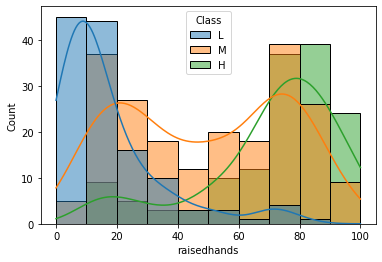

In [24]:
sns.histplot(data=df,x='raisedhands',hue='Class',hue_order=['L','M','H'],kde=True)

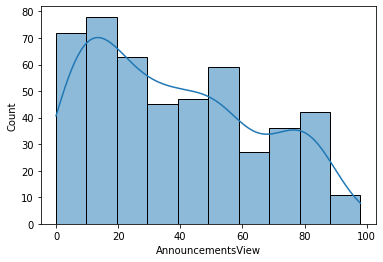

In [25]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(data=df,x='AnnouncementsView',kde=True)

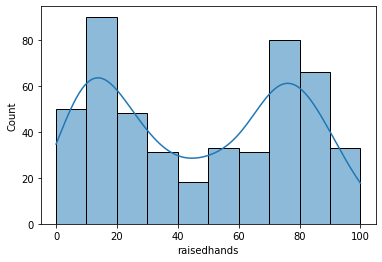

In [26]:
sns.histplot(x='raisedhands',data=df,kde=True)

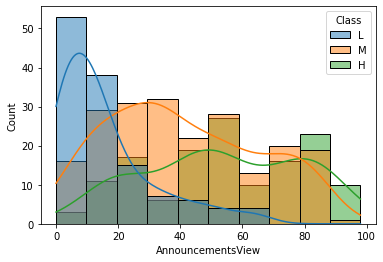

In [27]:
sns.histplot(x='AnnouncementsView',hue='Class',hue_order=['L','M','H'],kde=True,data=df)

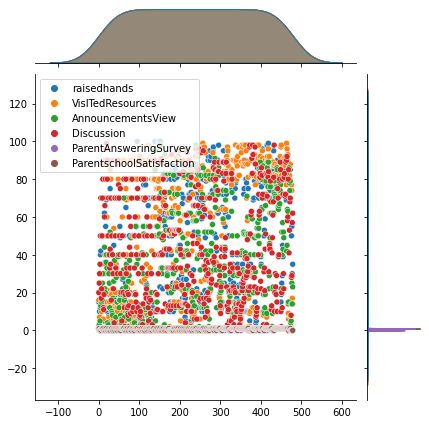

In [28]:
sns.jointplot(data=df)

### 문제 6. Countplot을 이용하여 범주별 통계 확인하기


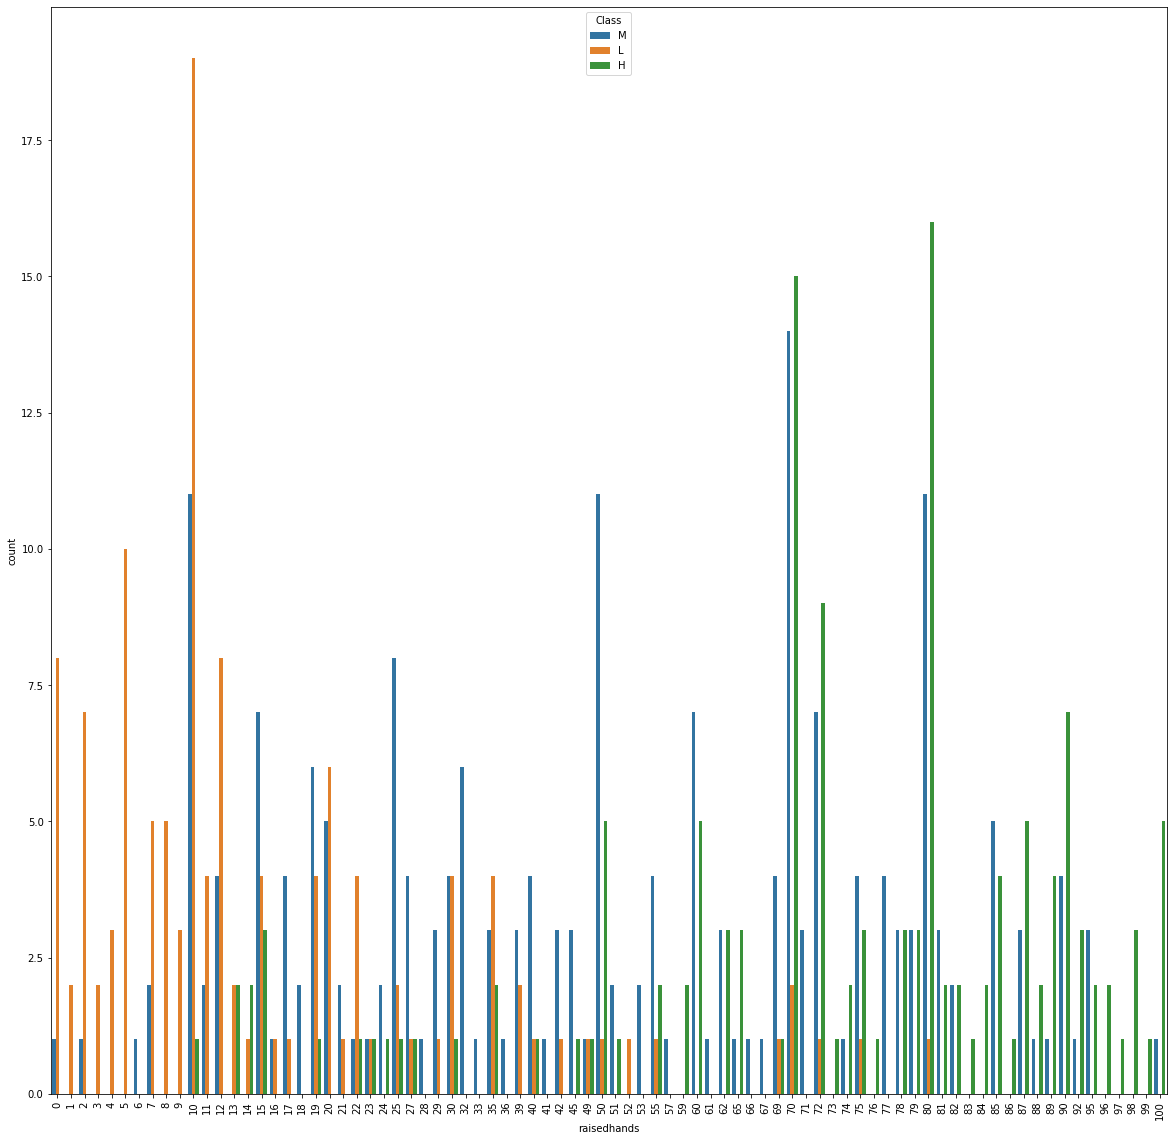

In [29]:
plt.figure(figsize=[20,20])
plt.xticks(rotation=90)
sns.countplot(data=df,x='raisedhands',hue='Class')

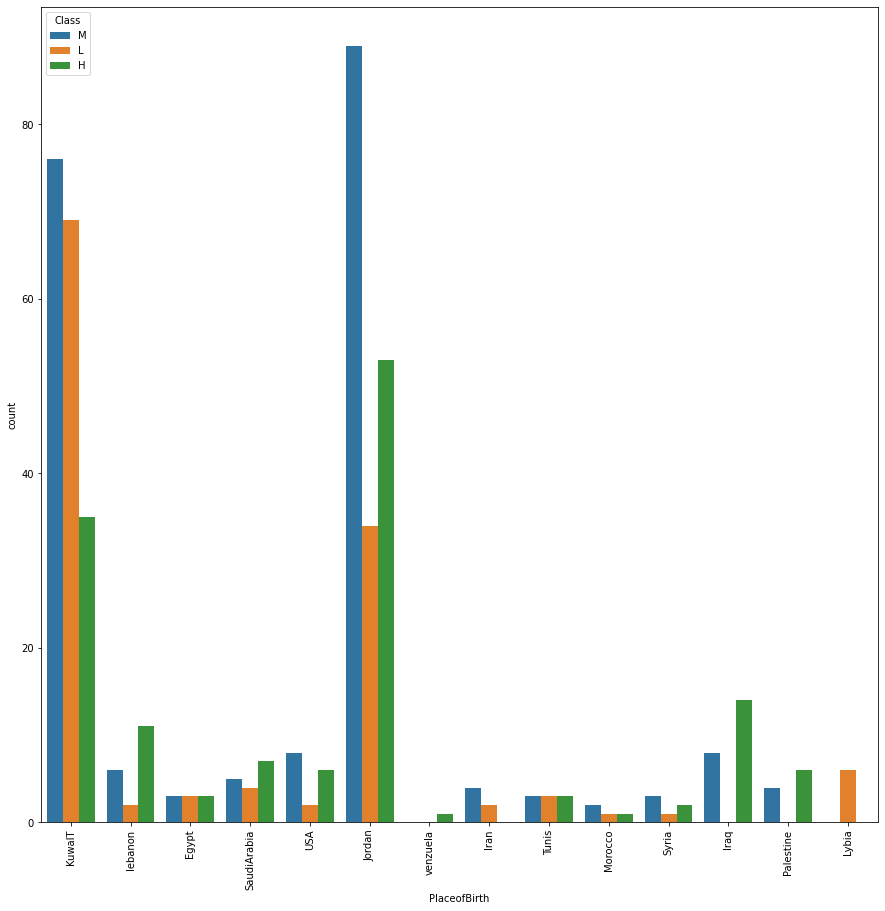

In [30]:
# seaborn의 countplot()을 사용
# Hint) x와 hue를 사용하여 범주별 Class 통계 확인
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.countplot(data=df,x='PlaceofBirth',hue='Class')

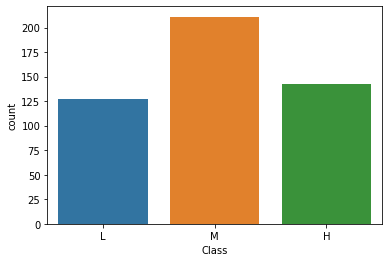

In [41]:
sns.countplot(data=df,x='Class',order=['L','M','H'])

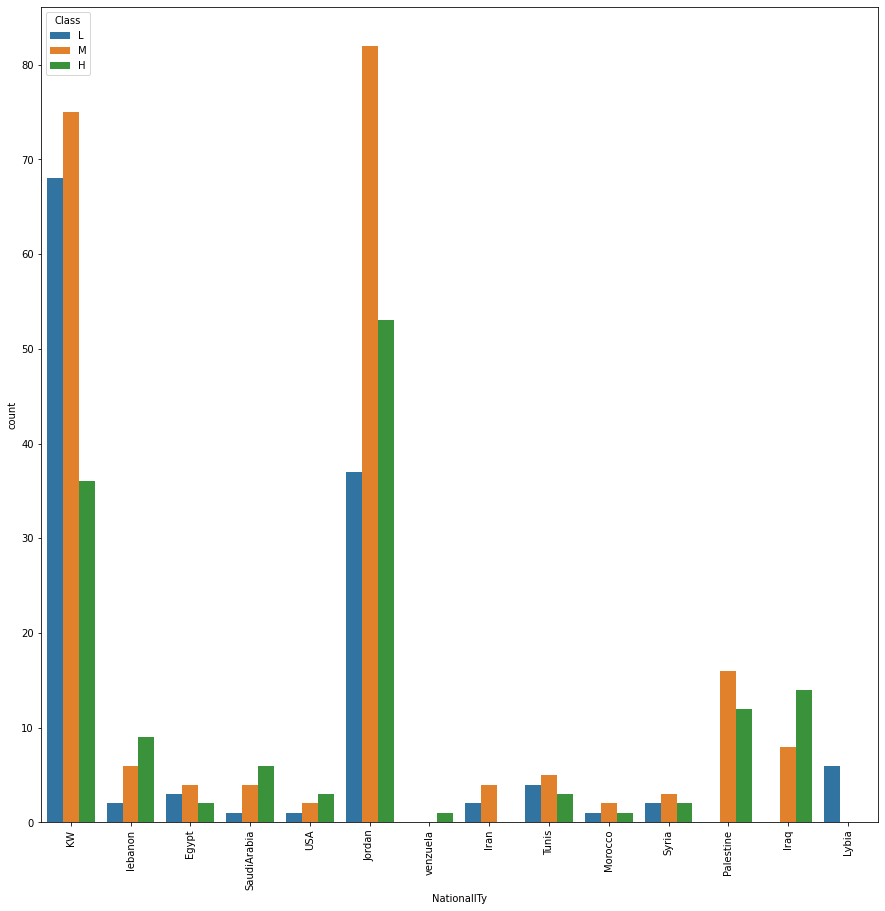

In [43]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.countplot(data=df,x='NationalITy',hue='Class',hue_order=['L','M','H'])

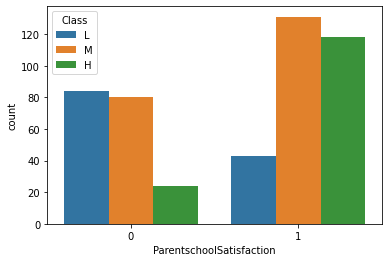

In [45]:
sns.countplot(data=df,x='ParentschoolSatisfaction',hue='Class',hue_order=['L','M','H'])

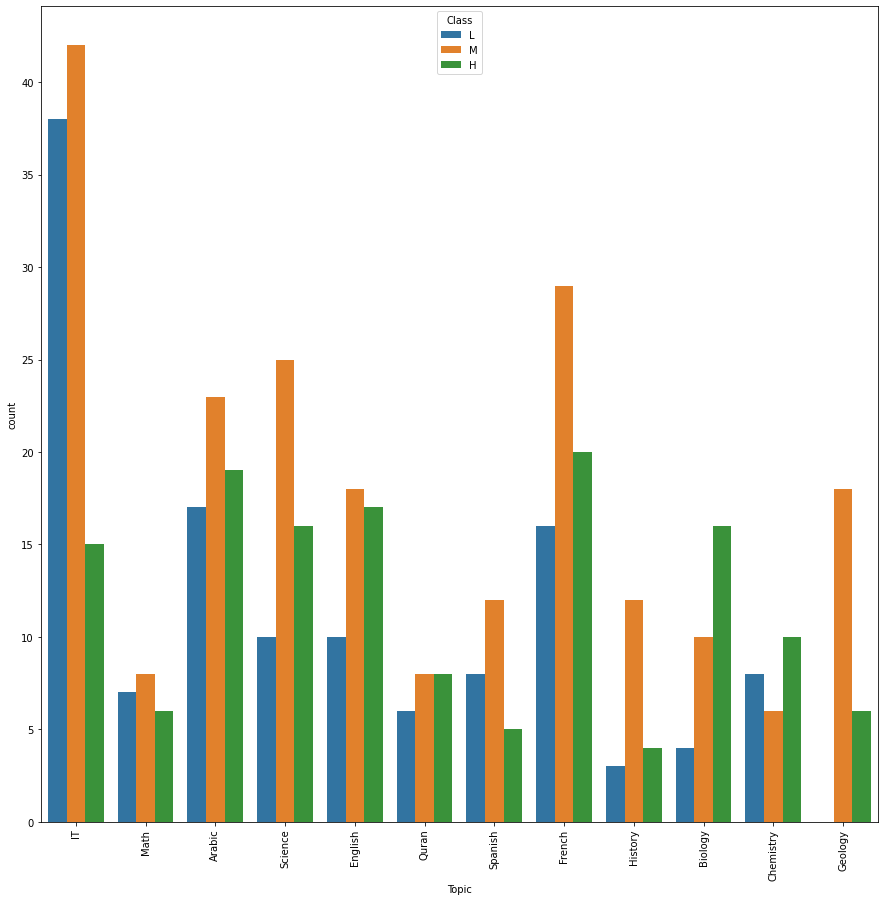

In [46]:
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
sns.countplot(data=df,x='Topic',hue='Class',hue_order=['L','M','H'])

### 문제 7. 범주형 대상 Class 컬럼을 수치로 바꾸어 표현하기

In [47]:
# L, M, H를 숫자로 바꾸어 표현하기 (eg. L: -1, M: 0, H:1)
# Hint) DataFrame의 map() 메소드를 사용
df['Class_Value'] = df['Class'].map(dict(L=-1,M=0,H=1))


In [48]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_Value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,1,1,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,1,1,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,0,0,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,0,0,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,0,0,Above-7,M,0


gender
F    0.291429
M   -0.118033
Name: Class_Value, dtype: float64


<BarContainer object of 2 artists>

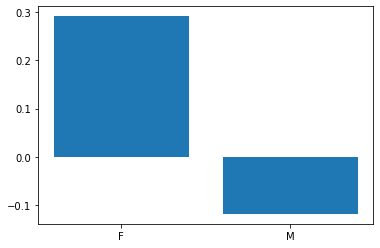

In [65]:
# 숫자로 바꾼 Class_value 컬럼을 이용해 다양한 시각화 수행하기
# groupby사용 -> 시각화
gb_gender = df.groupby('gender').mean()['Class_Value']
print(gb_gender)
plt.bar(gb_gender.index,height=gb_gender)

Topic
Biology      0.400000
Geology      0.250000
English      0.155556
Science      0.117647
Quran        0.090909
Chemistry    0.083333
French       0.061538
History      0.052632
Arabic       0.033898
Math        -0.047619
Spanish     -0.120000
IT          -0.242105
Name: Class_Value, dtype: float64


<BarContainer object of 12 artists>

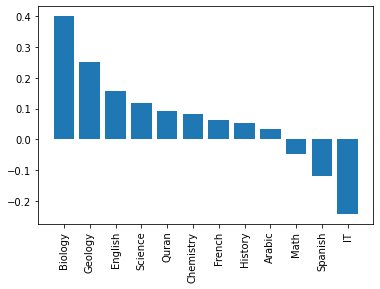

In [64]:
gb_topic = df.groupby('Topic').mean()['Class_Value'].sort_values(ascending=False)
print(gb_topic)
plt.xticks(rotation=90)
plt.bar(gb_topic.index,height=gb_topic)

StudentAbsenceDays
Under-7    0.439446
Above-7   -0.586387
Name: Class_Value, dtype: float64


<BarContainer object of 2 artists>

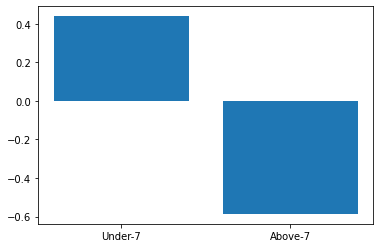

In [63]:
gb_student = df.groupby('StudentAbsenceDays').mean()['Class_Value'].sort_values(ascending=False)
print(gb_student)
plt.bar(gb_student.index,gb_student)

## Step 3. 모델 학습을 위한 데이터 전처리


### 문제 8. get_dummies()를 이용하여 범주형 데이터 전처리하기


In [66]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_Value'],
      dtype='object')

In [74]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환하기
# Hint) Multicollinearity를 피하기 위해 drop_first=True로 설정
# drop_first는 첫번째 행을 날려버림(데이터프레임 용량을 줄일 수 있음)
X = pd.get_dummies(df.drop(['ParentschoolSatisfaction','Class_Value','Class'],axis=1),columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation','ParentAnsweringSurvey','StudentAbsenceDays'],drop_first=True)
y = df['Class']



In [75]:
X

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,NationalITy_Morocco,NationalITy_Palestine,NationalITy_SaudiArabia,NationalITy_Syria,NationalITy_Tunis,NationalITy_USA,NationalITy_lebanon,NationalITy_venzuela,PlaceofBirth_Iran,PlaceofBirth_Iraq,PlaceofBirth_Jordan,PlaceofBirth_KuwaIT,PlaceofBirth_Lybia,PlaceofBirth_Morocco,PlaceofBirth_Palestine,PlaceofBirth_SaudiArabia,PlaceofBirth_Syria,PlaceofBirth_Tunis,PlaceofBirth_USA,PlaceofBirth_lebanon,PlaceofBirth_venzuela,StageID_MiddleSchool,StageID_lowerlevel,GradeID_G-04,GradeID_G-05,GradeID_G-06,GradeID_G-07,GradeID_G-08,GradeID_G-09,GradeID_G-10,GradeID_G-11,GradeID_G-12,SectionID_B,SectionID_C,Topic_Biology,Topic_Chemistry,Topic_English,Topic_French,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_1,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,5,4,5,8,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
476,50,77,14,28,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
477,55,74,25,29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
478,30,17,14,57,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


### 문제 9. 학습데이터와 테스트데이터 분리하기


In [76]:
from sklearn.model_selection import train_test_split

In [82]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Step 4. Classification 모델 학습하기


### 문제 10. Logistic Regression 모델 생성/학습하기


In [78]:
from sklearn.linear_model import LogisticRegression

In [83]:
# LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=10000)
model_lr.fit(X_train,y_train)




LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 문제 11. 모델 학습 결과 평가하기


In [77]:
from sklearn.metrics import classification_report

In [85]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_lr.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.79      0.79      0.79        33
           M       0.60      0.68      0.64        56

    accuracy                           0.70       144
   macro avg       0.72      0.71      0.71       144
weighted avg       0.71      0.70      0.70       144



### 문제 12. XGBoost 모델 생성/학습하기


In [79]:
from xgboost import XGBClassifier

In [86]:
# XGBClassifier 모델 생성/학습
model_xgb = XGBClassifier()
model_xgb.fit(X_train,y_train)




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

### 문제 13. 모델 학습 결과 평가하기


In [88]:
# Predict를 수행하고 classification_report() 결과 출력하기
pred = model_xgb.predict(X_test)
print(classification_report(y_test,pred))




              precision    recall  f1-score   support

           H       0.83      0.64      0.72        55
           L       0.79      0.82      0.81        33
           M       0.62      0.75      0.68        56

    accuracy                           0.72       144
   macro avg       0.75      0.73      0.74       144
weighted avg       0.74      0.72      0.72       144



## Step5 모델 학습 결과 심화 분석하기


### 문제 14. Logistic Regression 모델 계수로 상관성 파악하기

In [89]:
# (3,59) : 3: 클래스 59: 학습한 갯수
model_lr.coef_.shape

(3, 59)

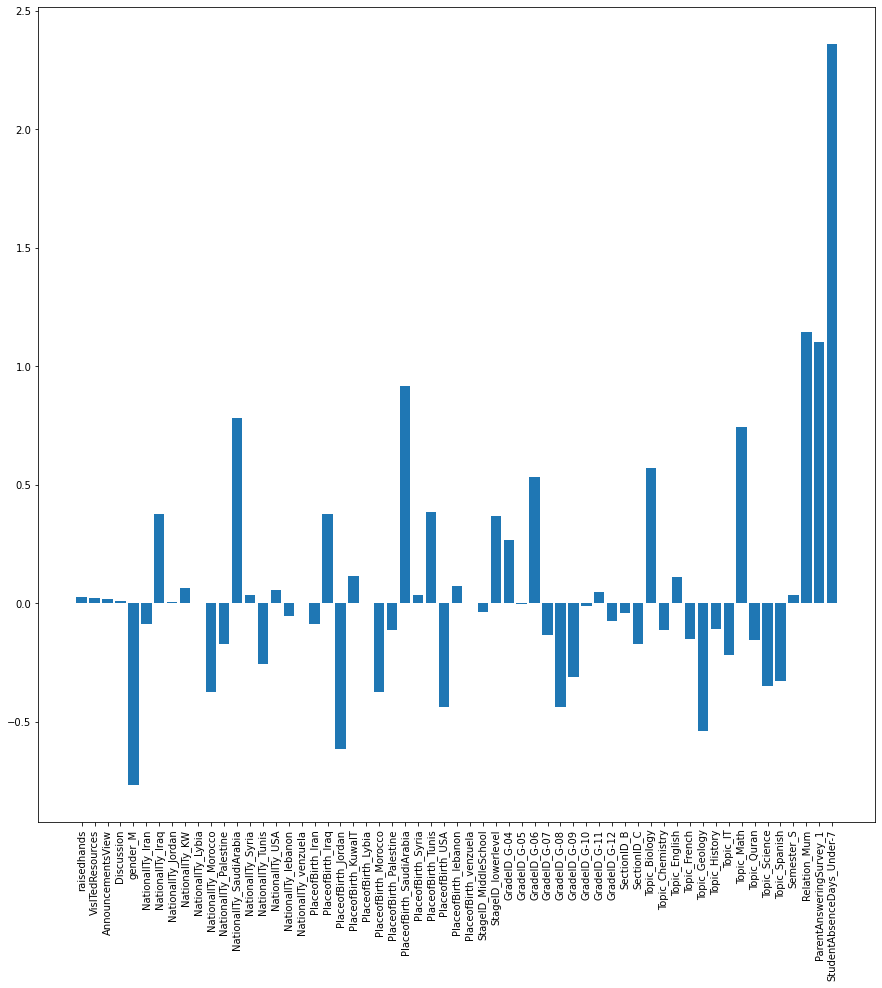

In [104]:
# Logistic Regression 모델의 coef_ 속성을 plot하기
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
plt.bar(X.columns,model_lr.coef_[0,:])
plt.show()



### 문제 15. XGBoost 모델로 특징의 중요도 확인하기

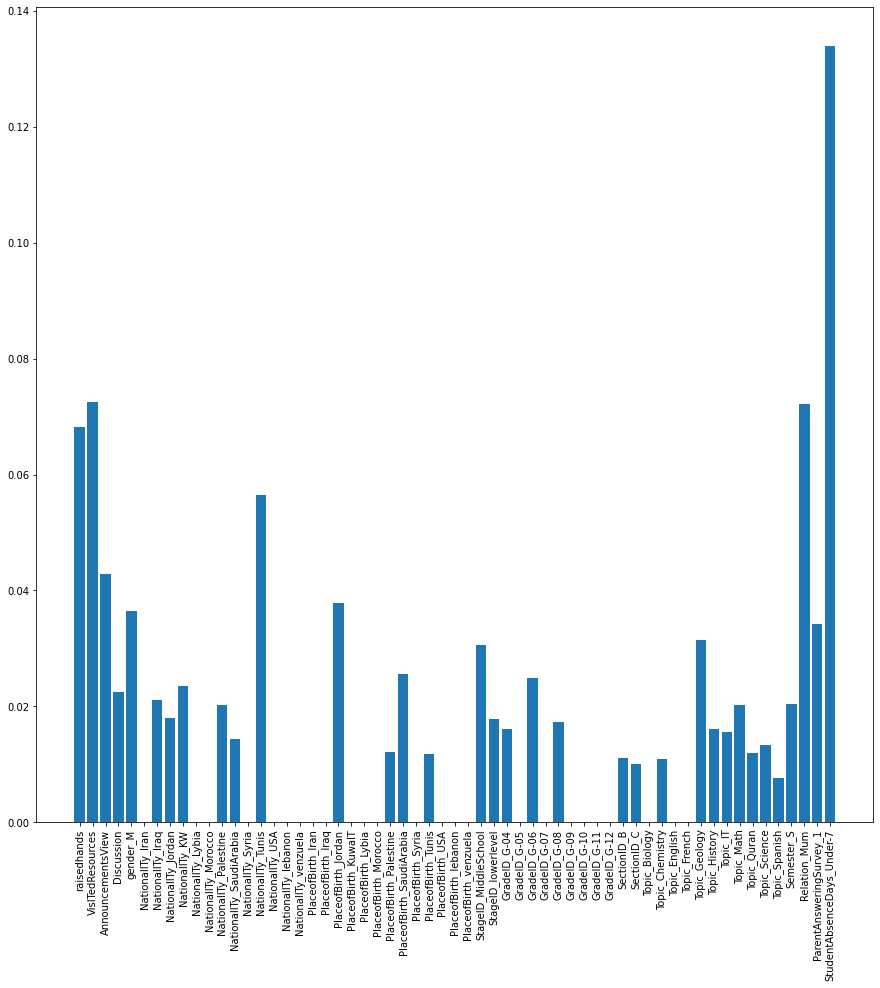

In [101]:
# XGBoost 모델의 feature_importances_ 속성을 plot하기
plt.figure(figsize=[15,15])
plt.xticks(rotation=90)
plt.bar(X.columns,model_xgb.feature_importances_)
plt.show()

